In [1]:
using ImmersedLayers

┌ Info: Precompiling ImmersedLayers [cdc13194-334e-4e1c-bc8d-fc3a28509c85]
└ @ Base loading.jl:1317


In [8]:
using CartesianGrids
using RigidBodyTools
using Plots
using UnPack
using LinearAlgebra

In [3]:
Δx = 0.01
Lx = 4.0
xlim = (-Lx/2,Lx/2)
ylim = (-Lx/2,Lx/2)
g = PhysicalGrid(xlim,ylim,Δx);

In [4]:
RadC = Lx/4
Δs = 1.4*cellsize(g);
body = Circle(RadC,Δs);

angs(n) = range(0,2π,length=n+1)[1:n];

In [5]:
X = VectorData(collect(body))

w = Nodes(Dual,size(g))
ϕ = Nodes(Primal,size(g))
q = Edges(Primal,size(g))
f = ScalarData(X);

In [14]:
cache = SurfaceScalarCache(body,g);

In [7]:
A = CLinvCT(cache,scale=cellsize(g));

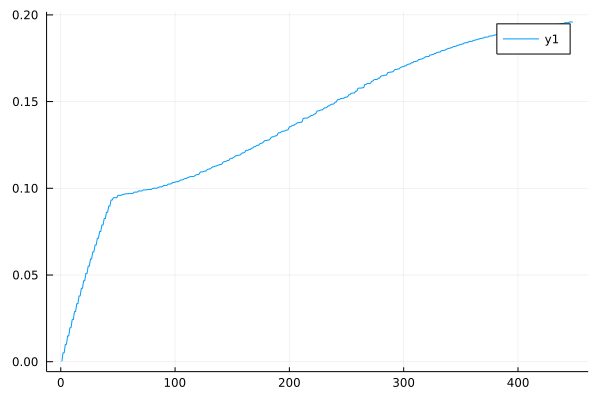

In [9]:
plot(eigvals(A))

In [80]:
A = GLinvD(cache,scale=cellsize(g));

In [15]:
A = nRTRn(cache);

In [13]:
maximum(eigvals(A))

45.06695701248229

In [82]:
@unpack L, regop = cache
Rn = RegularizationMatrix(regop,f,w);

f .= sin.(angs(length(body)) .- π/4);

surface_curl!(f,L\(Rn*f),cache);
surface_divergence!(ϕ,ScalarData(A\f),cache);
ϕ .= L\ϕ;

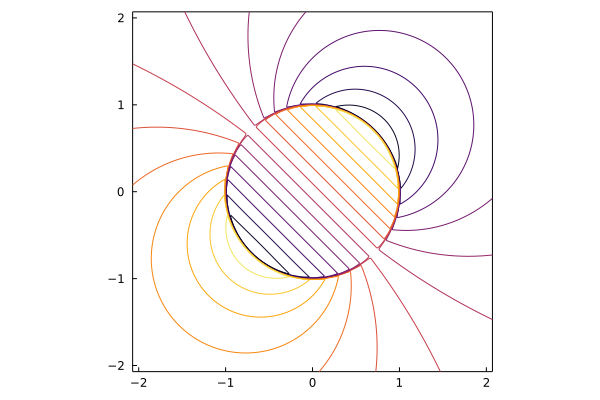

In [12]:
plot(ϕ,g)

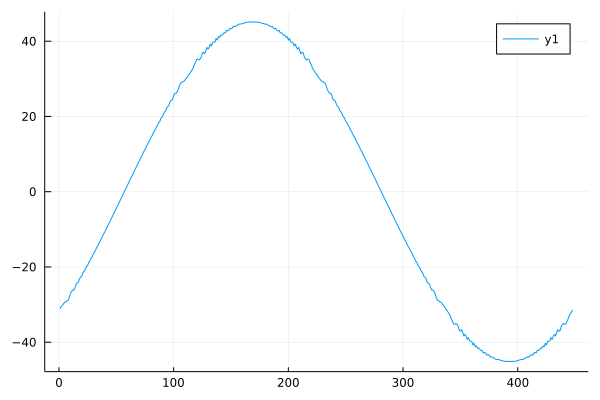

In [83]:
f .= sin.(angs(length(body)) .- π/4);

regularize_normal!(q,f,cache)
normal_interpolate!(f,q,cache)
plot(f)

In [86]:
  @test minimum(f) ≈ -45 atol = 1e-0


Test Passed

In [98]:
A = nRTRn(cache);

In [101]:
minimum(eigvals(A)) 

11.336172026182016

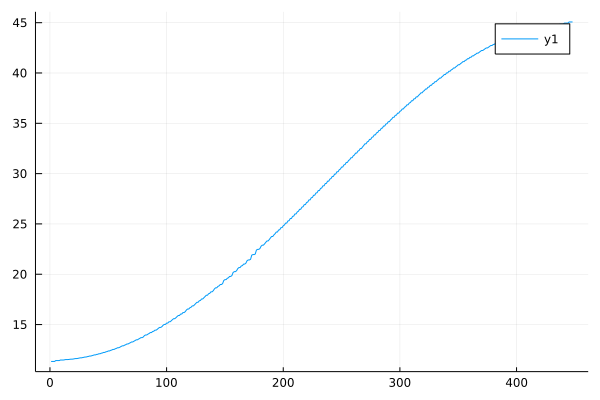

In [15]:
plot(eigvals(A))

In [16]:
V = eigvecs(A);

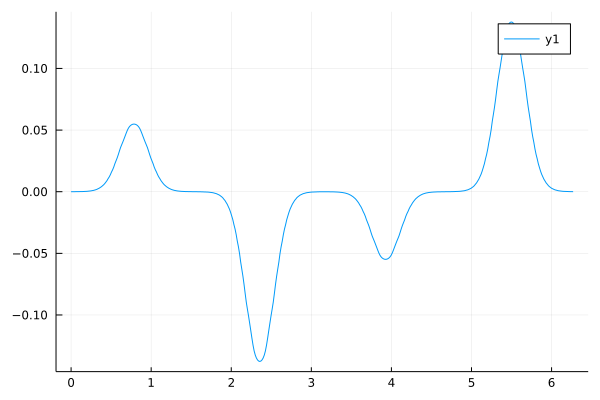

In [17]:
plot(angs(length(body)),V[:,end-2])

In [18]:
vcache = SurfaceVectorCache(body,g);

In [88]:
dq = EdgeGradient(Primal,size(g));
q = Edges(Primal,size(g));
vs = VectorData(X)
vs.u .= sin.(angs(length(body)) .- π/4);

In [89]:
regularize_normal!(dq,vs,vcache);

In [90]:
normal_interpolate!(vs,dq,vcache);

In [96]:
@test maximum(vs.u) ≈ 155 atol = 1e-0

Test Passed

In [97]:
surface_divergence!(q,vs,vcache);

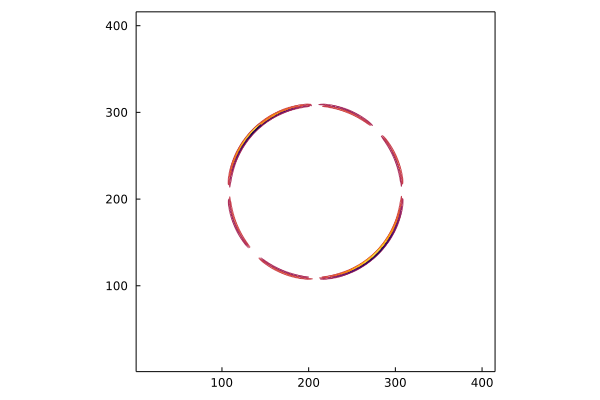

In [38]:
plot(q.v)

In [27]:
normal_interpolate!(vs,dq,vcache);

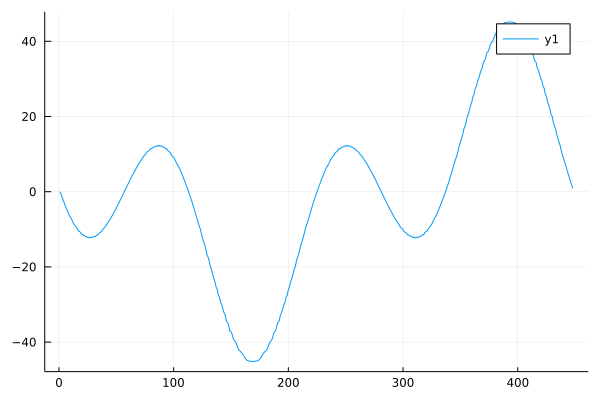

In [29]:
plot(vs.v)

In [42]:
surface_grad!(vs,q,vcache);

In [105]:
A = GLinvD(vcache,scale=cellsize(g));

In [107]:
@test maximum(eigvals(A)) ≈ 1.8 atol = 1e-1


Test Passed

In [55]:
A = nRTRn(vcache);

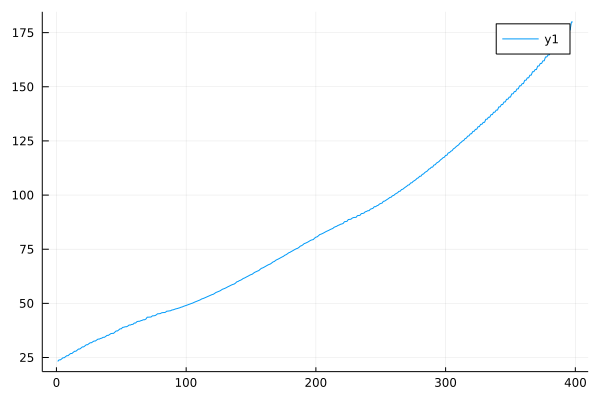

In [61]:
plot(eigvals(A[499:end,499:end]))